In [1]:
import pydiffmap
from utils import get_dataset, make_plot
from metrics import knn_accuracy, stability, stress, strain

C:\tools\miniconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
input, labels = get_dataset("mnist", sample_percent=0.2)

(70000, 784)
(70000,)


In [3]:
diffMap = pydiffmap.diffusion_map.DiffusionMap.from_sklearn(n_evecs=10, kernel_type='gaussian')
embeddings = diffMap.fit_transform(input)


<AxesSubplot:>

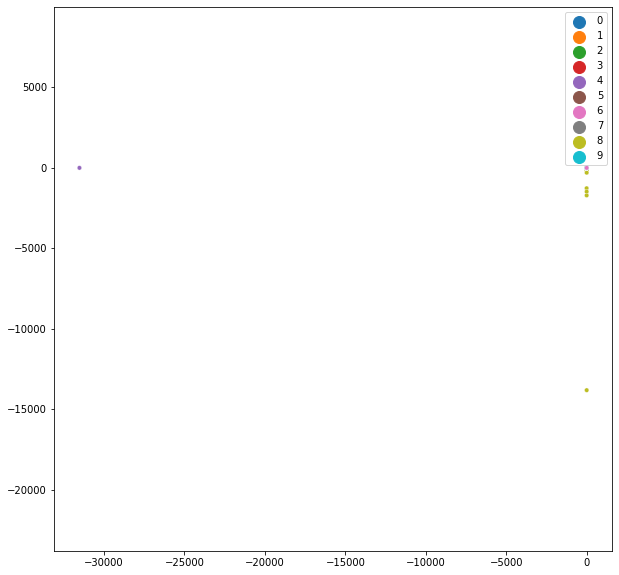

In [5]:
make_plot(embeddings, labels, marker_size=20)

In [6]:
knn_accuracy(embeddings,labels)

(0.8053571428571427, 0.0035678553553549143)

In [7]:
input1, labels1 = get_dataset("coil20",sample_percent=0.2)
embedding1 = diffMap.fit_transform(input1)

input2, labels2 = get_dataset("coil20")
embedding2 = diffMap.fit_transform(input2)
embedding2 = embedding2[0:int(0.2*len(embedding2)) ]
labels2 =  labels2[0:int(0.2*len(labels2)) ]

# compute the metric
stability(embedding1, embedding2)

0.7893223047745843

In [8]:
stress(input, embeddings)

1377170519779995.0

In [9]:
strain(input, embeddings)

MemoryError: Unable to allocate 1.46 GiB for an array with shape (14000, 14000) and data type float64